In [1]:
import dynalearn as dl
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import h5py
from matplotlib.lines import Line2D

/home/charles/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/charles/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/charles/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/charles/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [2]:
datasets = [
    r"contacts-prox-high-school-2013",
    r"copresence-InVS13",
    r"copresence-InVS15",
    r"copresence-LH10",
    r"copresence-SFHH",
    r"copresence-Thiers13",
    # "ia-contacts_dublin",
    r"ia-contacts-hypertext2009",
]

steps_per_network = 10


In [3]:
color_pale = {0:dl.utilities.color_pale["blue"], 1:dl.utilities.color_pale["red"]}
color_dark = {0:dl.utilities.color_dark["blue"], 1:dl.utilities.color_dark["red"]}

def plot_forecast(data, ax, linestyle="None", marker="None", color=color_pale):
    for i in range(num_states):
        x = np.arange(data.shape[1])
        y = np.mean(data[:, :, i], axis=0)
#         std = np.std(data[:, :, i], axis=0)
#         y_min = y - std
#         y_max = y + std
#         y_min = np.min(data[:, :, i], axis=0)
#         y_max = np.max(data[:, :, i], axis=0)
        y_min = np.percentile(data[:,:,i], 16, axis=0)
        y_max = np.percentile(data[:,:,i], 85, axis=0)
        ax.plot(x, y, ls=linestyle, marker=marker, c=color[i], lw=3)
        ax.fill_between(x, y_min, y_max, color=color[i], alpha=0.2)

        
def plot_milestones(ax):
    c = dl.utilities.color_pale["grey"]
    for i, m in enumerate(milestones):
        if i%2 == 0:
            ax.axvspan(m[0], m[1], color=c, alpha=0.2)
    
    

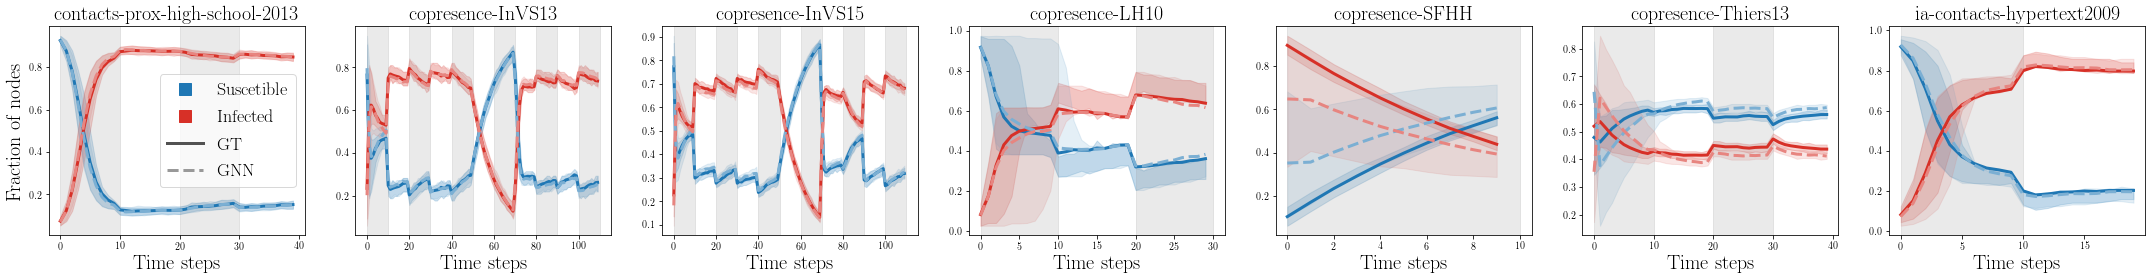

In [5]:

fig, ax = plt.subplots(1, 7, figsize=(30, 4))

for i, d in enumerate(datasets):
    path = "../data/real_data/plancksis/" + d + "/metrics.h5"
    
    f = h5py.File(path, "r")
    x = f["TrueRTNForecastMetrics/forecasts"][...]
    milestones = np.array([np.arange(0, x.shape[1], steps_per_network), 
                           np.arange(steps_per_network, 
                                     x.shape[1] + steps_per_network, 
                                     steps_per_network)]).T
    steps_per_network = 10
    num_states = 2
    plot_forecast(f["TrueRTNForecastMetrics/forecasts"][...], ax[i], linestyle="-", color=color_dark)
    plot_forecast(f["GNNRTNForecastMetrics/forecasts"][...], ax[i], linestyle="--", color=color_pale)
    plot_milestones(ax[i])
    ax[i].set_title(d, fontsize=20)
    ax[i].set_xlabel("Time steps", fontsize=20)
ax[0].set_ylabel("Fraction of nodes", fontsize=20)

handles = []

handles.append(Line2D([0], [0], marker='s', color=color_dark[0], label="Suscetible", ls='None', ms=12))
handles.append(Line2D([0], [0], marker='s', color=color_dark[1], label="Infected", ls='None', ms=12))
handles.append(Line2D([0], [0], marker='None', color=dl.utilities.color_dark["grey"], label="GT", ls='-', lw=3))
handles.append(Line2D([0], [0], marker='None', color=dl.utilities.color_pale["grey"], label="GNN", ls='--', lw=3))


ax[0].legend(handles=handles, 
             loc="center right", 
             fancybox=True, 
             fontsize=18, 
             framealpha=0.75, 
             ncol=1
)
plt.tight_layout()
fig.savefig("./plancksis-forecast.png")
    # plt.xlim(0, 200)

In [30]:
f["GNNRTNForecastMetrics/forecasts"][...].shape

(10, 2250, 2)